<a href="https://colab.research.google.com/github/leonardobora/pratica-aprendizado-de-maquina/blob/main/California_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregar dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Preco'] = data.target  # Variável alvo: preço médio de casas (em 100k USD)

# Exibir as primeiras linhas do dataset
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Preco
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Preco       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


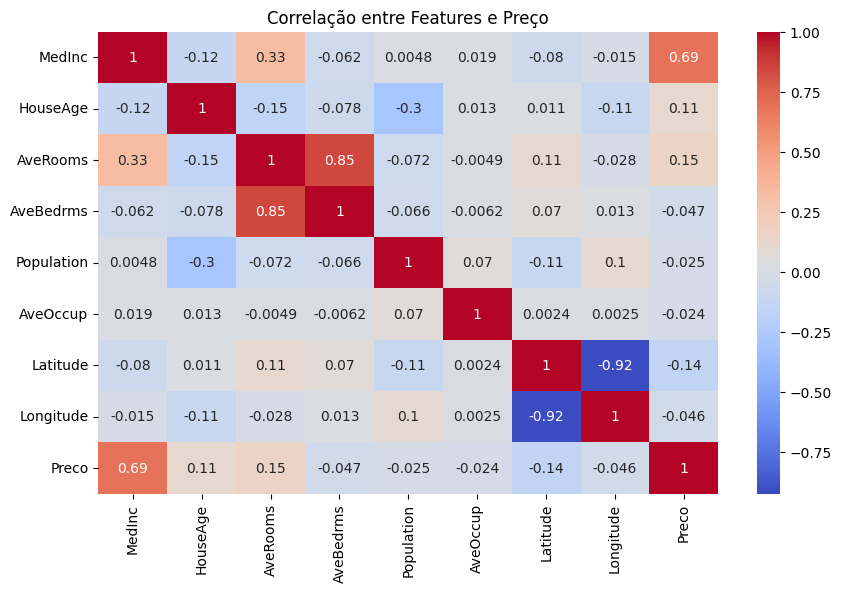

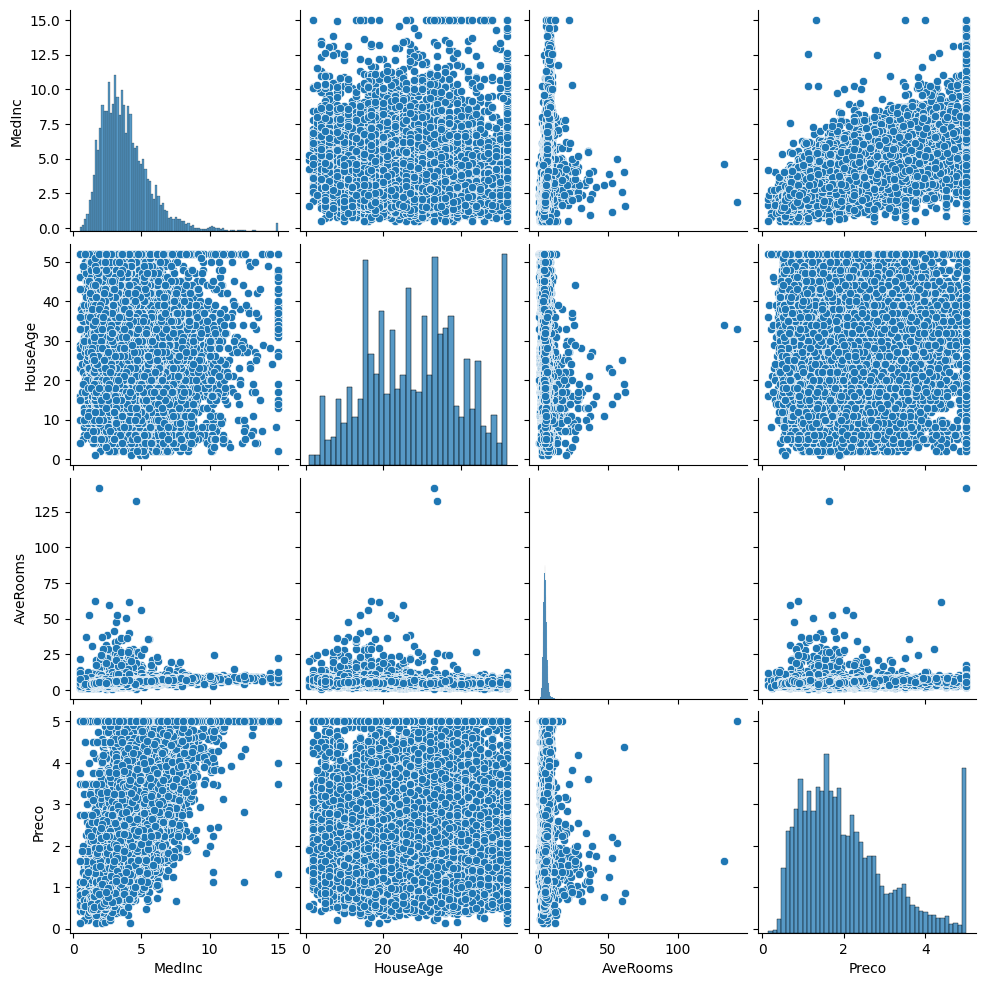

In [2]:
# Entender a estrutura dos dados
df.describe()
df.info()  # Verificar tipos de dados e valores faltantes

# Visualizar correlações
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Features e Preço')
plt.show()

# Plotar distribuições
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'Preco']])
plt.show()


In [3]:
# Tratar outliers
# Exemplo: Remover registros com "AveRooms" > 20
df = df[df['AveRooms'] <= 20]


In [4]:
# Dividir dataset em treino e teste
X = df.drop('Preco', axis=1)
y = df['Preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Modelo 1: Regressão Linear
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Modelo 2: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Modelo 3: XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)


In [6]:
# Avaliar modelos
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name}:')
    print(f'MSE: {mse:.2f}')
    print(f'R²: {r2:.2f}\n')

evaluate_model(y_test, y_pred_lr, 'Regressão Linear')
evaluate_model(y_test, y_pred_rf, 'Random Forest')
evaluate_model(y_test, y_pred_xgb, 'XGBoost')


Regressão Linear:
MSE: 0.52
R²: 0.61

Random Forest:
MSE: 0.26
R²: 0.81

XGBoost:
MSE: 0.23
R²: 0.83



## Etapa 2: Repetindo o exercício, mas agora com o Boston Housing dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


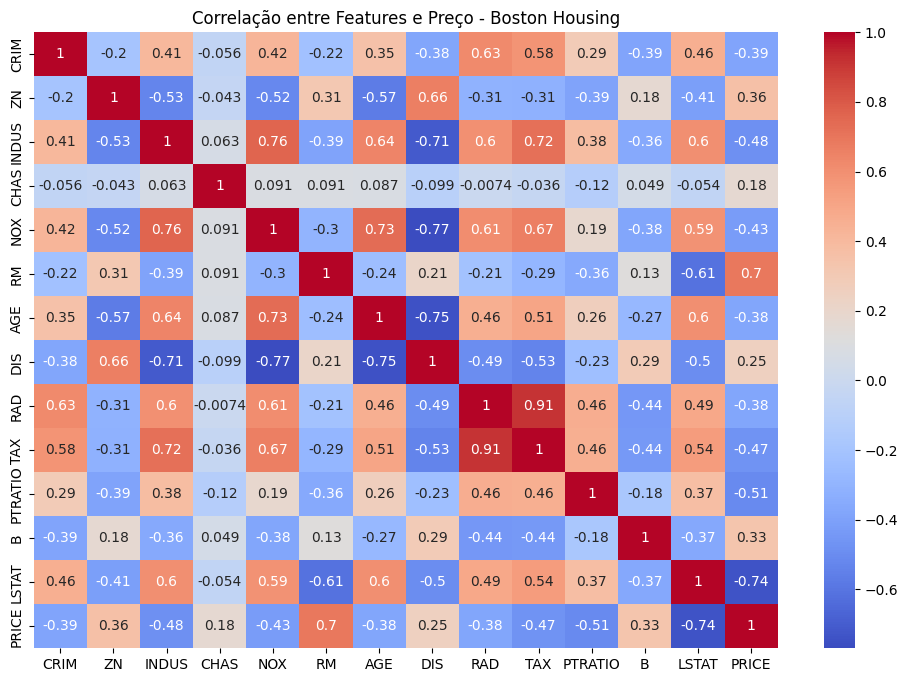

Regressão Linear - Boston:
MSE: 21.52
R²: 0.71

Random Forest - Boston:
MSE: 9.62
R²: 0.87

XGBoost - Boston:
MSE: 8.53
R²: 0.89

Comparação de R² entre California e Boston:
Regressão Linear: California 0.61 vs Boston 0.71
Random Forest: California 0.81 vs Boston 0.87
XGBoost: California 0.83 vs Boston 0.89


In [7]:
# Importar o dataset Boston Housing
from sklearn.datasets import fetch_openml

# Nota: O Boston Housing foi removido do sklearn, então usamos o fetch_openml
boston = fetch_openml(name="boston", version=1, as_frame=True)
boston_df = boston.data
boston_df['PRICE'] = boston.target

# Exibir as primeiras linhas
boston_df.head()

# Explorar dados
boston_df.describe()
boston_df.info()

# Visualizar correlações
plt.figure(figsize=(12, 8))
sns.heatmap(boston_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Features e Preço - Boston Housing')
plt.show()

# Dividir dataset
X_boston = boston_df.drop('PRICE', axis=1)
y_boston = boston_df['PRICE']
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_boston, y_boston, test_size=0.3, random_state=42)

# Normalizar
scaler_b = StandardScaler()
X_train_b_scaled = scaler_b.fit_transform(X_train_b)
X_test_b_scaled = scaler_b.transform(X_test_b)

# Treinar os mesmos modelos
lr_b = LinearRegression()
lr_b.fit(X_train_b_scaled, y_train_b)
y_pred_lr_b = lr_b.predict(X_test_b_scaled)

rf_b = RandomForestRegressor(n_estimators=100, random_state=42)
rf_b.fit(X_train_b_scaled, y_train_b)
y_pred_rf_b = rf_b.predict(X_test_b_scaled)

xgb_b = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_b.fit(X_train_b_scaled, y_train_b)
y_pred_xgb_b = xgb_b.predict(X_test_b_scaled)

# Avaliar
evaluate_model(y_test_b, y_pred_lr_b, 'Regressão Linear - Boston')
evaluate_model(y_test_b, y_pred_rf_b, 'Random Forest - Boston')
evaluate_model(y_test_b, y_pred_xgb_b, 'XGBoost - Boston')

# Comparar resultados entre os datasets
print("Comparação de R² entre California e Boston:")
print(f"Regressão Linear: California {r2_score(y_test, y_pred_lr):.2f} vs Boston {r2_score(y_test_b, y_pred_lr_b):.2f}")
print(f"Random Forest: California {r2_score(y_test, y_pred_rf):.2f} vs Boston {r2_score(y_test_b, y_pred_rf_b):.2f}")
print(f"XGBoost: California {r2_score(y_test, y_pred_xgb):.2f} vs Boston {r2_score(y_test_b, y_pred_xgb_b):.2f}")


## Etapa 3: Implementar um pipeline com ColumnTransformer


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Voltando ao dataset California Housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Preco'] = data.target

# Dividir em treino e teste
X = df.drop('Preco', axis=1)
y = df['Preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir transformadores para diferentes tipos de colunas
# Neste caso, todas são numéricas, mas vamos simular como seria com diferentes tipos
numeric_features = X.columns.tolist()  # Todas as colunas são numéricas neste dataset

# Criar o ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])

# Criar pipelines para cada modelo
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Treinar os pipelines
pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
pipeline_xgb.fit(X_train, y_train)

# Avaliar os modelos
y_pred_lr_pipe = pipeline_lr.predict(X_test)
y_pred_rf_pipe = pipeline_rf.predict(X_test)
y_pred_xgb_pipe = pipeline_xgb.predict(X_test)

evaluate_model(y_test, y_pred_lr_pipe, 'Pipeline - Regressão Linear')
evaluate_model(y_test, y_pred_rf_pipe, 'Pipeline - Random Forest')
evaluate_model(y_test, y_pred_xgb_pipe, 'Pipeline - XGBoost')


Pipeline - Regressão Linear:
MSE: 0.53
R²: 0.60

Pipeline - Random Forest:
MSE: 0.26
R²: 0.80

Pipeline - XGBoost:
MSE: 0.23
R²: 0.83



## Etapa 4: Testar hiperparâmetros com GridSearchCV no XGBoost


In [9]:
from sklearn.model_selection import GridSearchCV

# Definir o pipeline para XGBoost
pipeline_xgb_tune = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])

# Definir os hiperparâmetros para busca
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0]
}

# Para evitar crash da máquina, reduzimos o grid
param_grid_small = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline_xgb_tune,
    param_grid=param_grid_small,  # Use param_grid_small para evitar sobrecarga
    cv=3,  # Reduzido para 3 para economizar tempo
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1  # Use todos os cores disponíveis
)

# Executar a busca
grid_search.fit(X_train, y_train)

# Mostrar os melhores parâmetros
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
print(f"Melhor score: {-grid_search.best_score_:.4f} MSE")

# Avaliar o melhor modelo
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
evaluate_model(y_test, y_pred_best_xgb, 'Melhor XGBoost após GridSearchCV')


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Melhores parâmetros encontrados:
{'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
Melhor score: 0.2313 MSE
Melhor XGBoost após GridSearchCV:
MSE: 0.22
R²: 0.84



## Experimentar transformações não lineares

XGBoost com transformação logarítmica:
MSE: 0.23
R²: 0.82

Comparação entre modelos XGBoost:
Sem transformação: R² = 0.8272
Com transformação log: R² = 0.8244


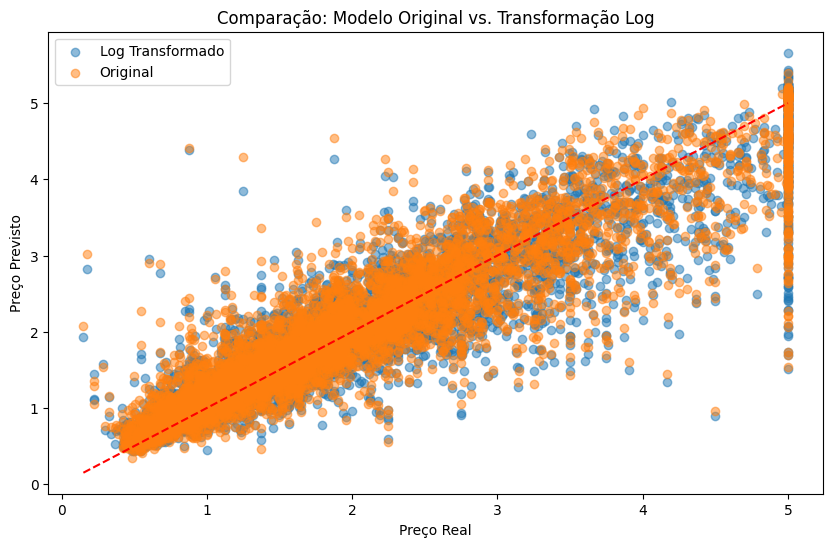

In [10]:
# Aplicar transformação logarítmica no preço
# Nota: Adicionamos 1 para evitar log(0)
y_log = np.log1p(y)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Criar pipeline para modelo com target transformado
pipeline_xgb_log = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Treinar o modelo
pipeline_xgb_log.fit(X_train, y_train_log)

# Fazer previsões e transformar de volta
y_pred_log = pipeline_xgb_log.predict(X_test)
y_pred_exp = np.expm1(y_pred_log)  # Transformar de volta

# Avaliar o modelo
evaluate_model(y_test, y_pred_exp, 'XGBoost com transformação logarítmica')

# Comparar com o modelo sem transformação
print("Comparação entre modelos XGBoost:")
print(f"Sem transformação: R² = {r2_score(y_test, y_pred_xgb_pipe):.4f}")
print(f"Com transformação log: R² = {r2_score(y_test, y_pred_exp):.4f}")

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_exp, alpha=0.5, label='Log Transformado')
plt.scatter(y_test, y_pred_xgb_pipe, alpha=0.5, label='Original')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('Comparação: Modelo Original vs. Transformação Log')
plt.legend()
plt.show()

## Conclusão e COmparação

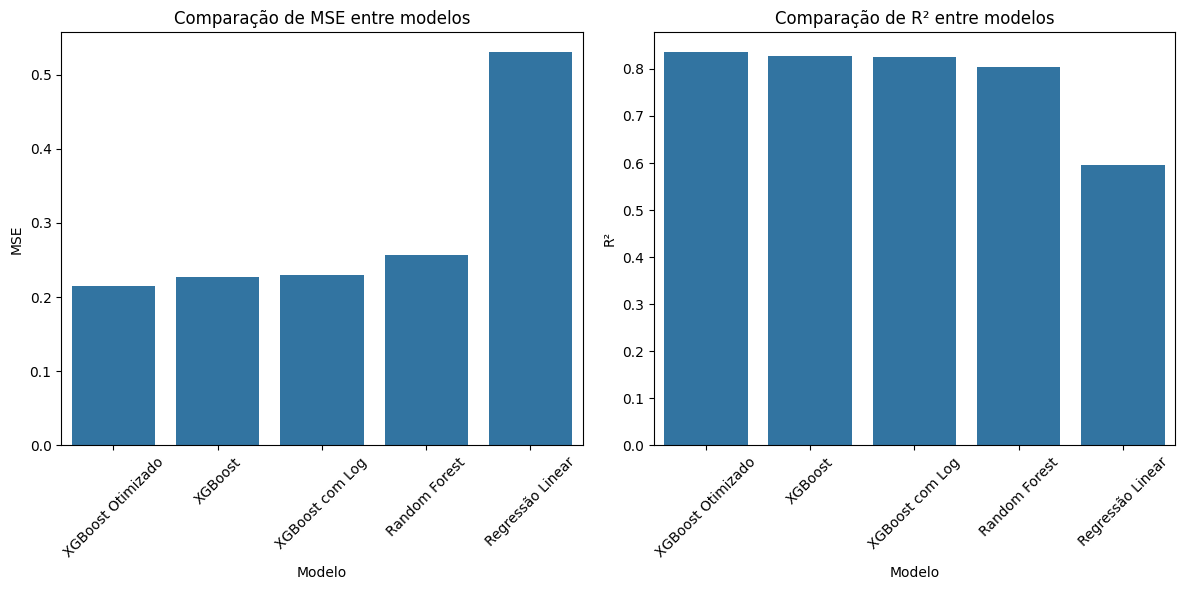

Tabela de resultados:
              Modelo       MSE        R²
3  XGBoost Otimizado  0.215491  0.835821
2            XGBoost  0.226744  0.827248
4    XGBoost com Log  0.230439  0.824433
1      Random Forest  0.256681  0.804439
0   Regressão Linear  0.530568  0.595770


In [11]:
# Criar um DataFrame com os resultados de todos os modelos
results = pd.DataFrame({
    'Modelo': ['Regressão Linear', 'Random Forest', 'XGBoost',
               'XGBoost Otimizado', 'XGBoost com Log'],
    'MSE': [mean_squared_error(y_test, y_pred_lr_pipe),
            mean_squared_error(y_test, y_pred_rf_pipe),
            mean_squared_error(y_test, y_pred_xgb_pipe),
            mean_squared_error(y_test, y_pred_best_xgb),
            mean_squared_error(y_test, y_pred_exp)],
    'R²': [r2_score(y_test, y_pred_lr_pipe),
           r2_score(y_test, y_pred_rf_pipe),
           r2_score(y_test, y_pred_xgb_pipe),
           r2_score(y_test, y_pred_best_xgb),
           r2_score(y_test, y_pred_exp)]
})

# Ordenar por R² (do maior para o menor)
results = results.sort_values('R²', ascending=False)

# Visualizar os resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Modelo', y='MSE', data=results)
plt.title('Comparação de MSE entre modelos')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='Modelo', y='R²', data=results)
plt.title('Comparação de R² entre modelos')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Tabela de resultados:")
print(results)
